<a href="https://colab.research.google.com/github/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/Desempenho_MUNICIPIO_PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**ANALISE O SEU MUNICÍPIO**

Consulte o código do seu Município [Aqui](https://www.ibge.gov.br/explica/codigos-dos-municipios.php), e insira abaixo:

Teste com João Pessoa: 2507507

Bayeux: 2501807

Pombal: 2512101

In [13]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import zipfile
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

In [35]:
#@title

df = pd.read_csv('https://github.com/mariaeco/Projeto_ICD_UFPB_EnemPB/blob/main/DADOS/ENEM_POR_ESCOLA_PB_1998-2019.zip?raw=true', compression = 'zip', sep=',')

var = widgets.Dropdown(
    options = df.CO_MUNICIPIO_RESIDENCIA.sort_values().unique().tolist(),
    value = 2507507,
    description = 'Escolha o código do município:',
    disabled=False,
    style={'description_width': 'initial'},
)
display(var)

Dropdown(description='Escolha o código do município:', index=95, options=(2500106.0, 2500205.0, 2500304.0, 250…

In [37]:
#@title
df['Internet'] = np.where(df['Internet'] == 0, "Não", "Sim")
df['Computador'] = np.where(df['Computador'] == 0, "Não", "Sim")
df['Celular'] = np.where(df['Celular'] == 0, "Não", "Sim")

df.CO_MUNICIPIO_RESIDENCIA = df['CO_MUNICIPIO_RESIDENCIA'].astype({'CO_MUNICIPIO_RESIDENCIA': pd.Int64Dtype()})
df = df[df["CO_MUNICIPIO_RESIDENCIA"] == var.value]
df = df.query('NU_ANO>2002')
nomeMunicipio = df.iloc[0]['NO_MUNICIPIO_RESIDENCIA']

sumario = df[['NU_NOTA_REDACAO','NU_NOTA_OBJETIVA','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT']].describe().round(1)
sumario.rename(columns = {'NU_NOTA_REDACAO':'Redação',
                          'NU_NOTA_OBJETIVA': 'Provas Objetivas',
                          'NU_NOTA_LC': 'Linguagens',
                          'NU_NOTA_CH': 'Humanas',
                          'NU_NOTA_CN':'Natureza',
                          'NU_NOTA_MT':'Matemática' }, inplace = True)

print(f'Município Escolhido: {nomeMunicipio}\n')
display(sumario)

Município Escolhido: ESPERANÇA



,Redação,Provas Objetivas,Linguagens,Humanas,Natureza,Matemática
count,1692.0,1692.0,1138.0,1138.0,1138.0,1138.0
mean,550.2,455.3,502.4,520.7,480.2,492.4
std,164.5,108.2,67.1,80.4,71.6,96.8
min,0.0,111.1,267.9,322.9,321.7,316.0
25%,460.0,404.6,457.9,457.8,422.0,419.6
50%,560.0,466.2,504.3,523.0,471.5,473.3
75%,650.0,523.8,549.6,581.0,530.8,553.2
max,980.0,904.8,697.1,725.6,701.2,836.0


#**PERFIL DO CANDIDATO INSCRITO**

##**Número de Inscritos por Categoria**

Text(0, 0.5, 'Possui Internet?')

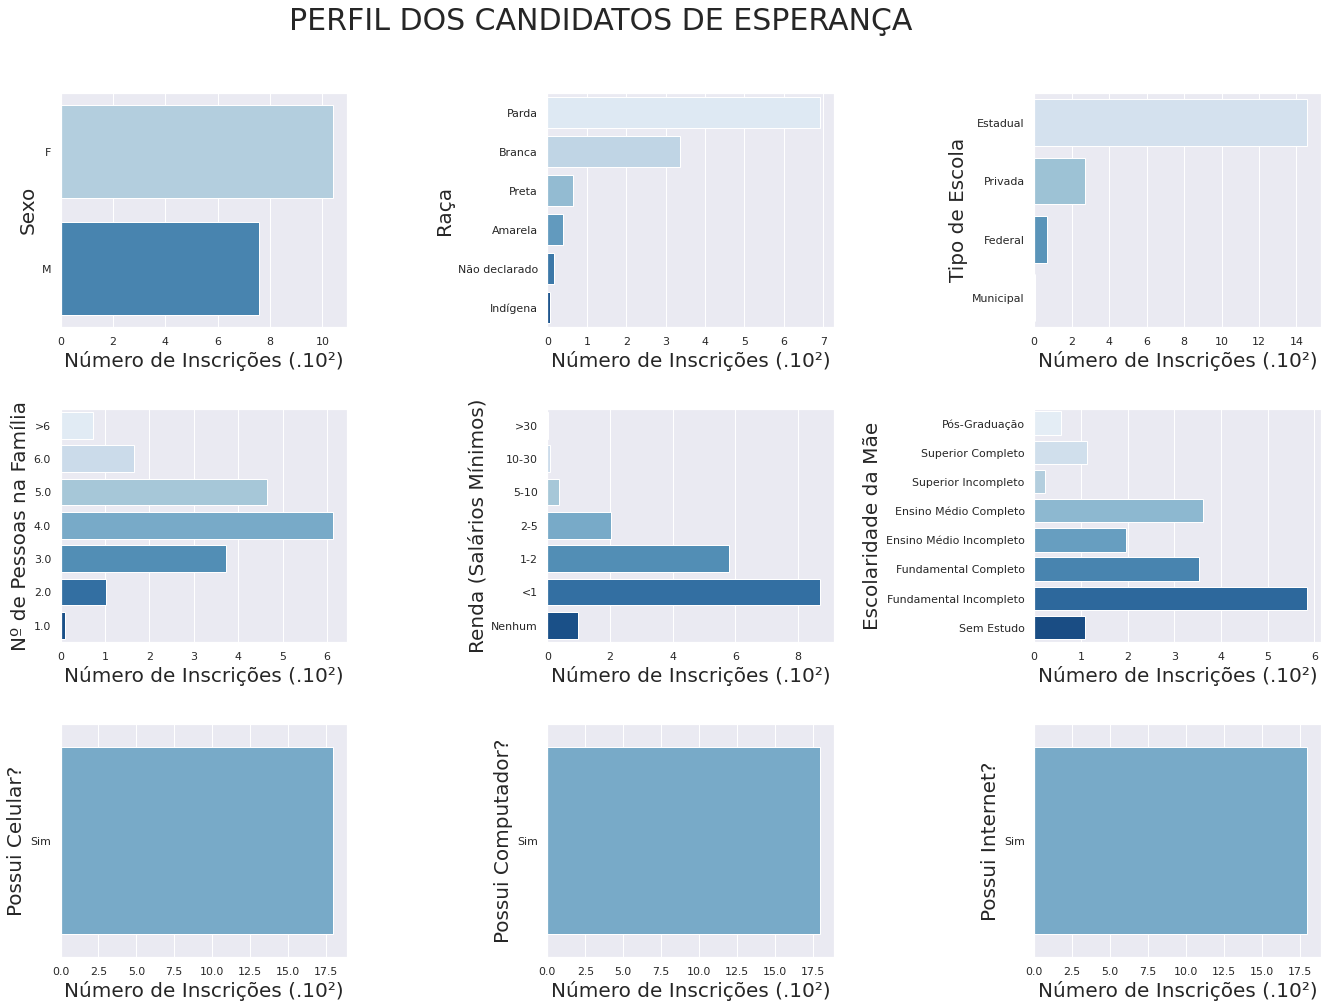

In [38]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle(f'PERFIL DOS CANDIDATOS DE {nomeMunicipio}', fontsize=30)

# Distancia entre os subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.35)

#SEXO =================================================================================================================
sexo=df.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
sexo['NU_INSCRICAO']=sexo['NU_INSCRICAO']/100
sexo.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
sexo['Porcentagem']=sexo['NU_INSCRICAO']/sexo['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[0, 0], y ='TP_SEXO', x ='NU_INSCRICAO', palette = 'Blues',data = sexo)
axes[0,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,0].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=df.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
raca['NU_INSCRICAO']=raca['NU_INSCRICAO']/100
raca.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
raca['Porcentagem']=raca['NU_INSCRICAO']/raca['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[0, 1], y ='TP_COR_RACA', x ='NU_INSCRICAO', palette = 'Blues', data = raca)
axes[0,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,1].set_ylabel('Raça', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
tipEsc['NU_INSCRICAO']=tipEsc['NU_INSCRICAO']/100
tipEsc['Porcentagem'] = tipEsc['NU_INSCRICAO']/tipEsc['NU_INSCRICAO'].sum()*100

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='NU_INSCRICAO', palette = 'Blues', order=order, data = tipEsc)
axes[0,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[0,2].set_ylabel('Tipo de Escola', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
df['NP'] = np.where(df['NPessoas'] > 6, ">6", df['NPessoas'] )
nPessoas=df.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
nPessoas['NU_INSCRICAO']=nPessoas['NU_INSCRICAO']/100
nPessoas['Porcentagem']=nPessoas['NU_INSCRICAO']/nPessoas['NU_INSCRICAO'].sum()*100

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='NU_INSCRICAO', palette = 'Blues',order=order, data = nPessoas)
axes[1,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=df.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
renda['NU_INSCRICAO']=renda['NU_INSCRICAO']/100
renda['Porcentagem']=renda['NU_INSCRICAO']/renda['NU_INSCRICAO'].sum()*100

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='NU_INSCRICAO', palette = 'Blues',order=order, data = renda)
axes[1,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['Escolaridade_Mae'], as_index=False)['NU_INSCRICAO'].count()
esc['NU_INSCRICAO']=esc['NU_INSCRICAO']/100
esc.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)
esc['Porcentagem']=esc['NU_INSCRICAO']/esc['NU_INSCRICAO'].sum()*100

order_esc = ['Pós-Graduação', 'Superior Completo','Superior Incompleto',
         'Ensino Médio Completo', 'Ensino Médio Incompleto',
         'Fundamental Completo', 'Fundamental Incompleto','Sem Estudo' ]
sns.barplot(ax=axes[1, 2], y ='Escolaridade_Mae', x ='NU_INSCRICAO', palette = 'Blues', 
            order=order_esc, data = esc)
axes[1,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[1,2].set_ylabel('Escolaridade da Mãe', fontsize=20)


#CELULAR ================================================================================================================================
cel=df.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
cel['NU_INSCRICAO']=cel['NU_INSCRICAO']/100
cel['Porcentagem'] = cel['NU_INSCRICAO']/cel['NU_INSCRICAO'].sum()*100

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NU_INSCRICAO', palette = 'Blues', data = cel)
axes[2,0].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=df.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
comp['NU_INSCRICAO']=comp['NU_INSCRICAO']/100
comp['Porcentagem'] = comp['NU_INSCRICAO']/comp['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[2, 1], y ='Computador', x ='NU_INSCRICAO', palette = 'Blues', data = comp)
axes[2,1].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=df.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
intern['NU_INSCRICAO']=intern['NU_INSCRICAO']/100
intern['Porcentagem'] = intern['NU_INSCRICAO']/intern['NU_INSCRICAO'].sum()*100

sns.barplot(ax=axes[2, 2], y ='Internet', x ='NU_INSCRICAO', palette = 'Blues', data = intern)
axes[2,2].set_xlabel('Número de Inscrições (.10²)', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

#**Número de Ausentes**

Text(0, 0.5, 'Possui Internet?')

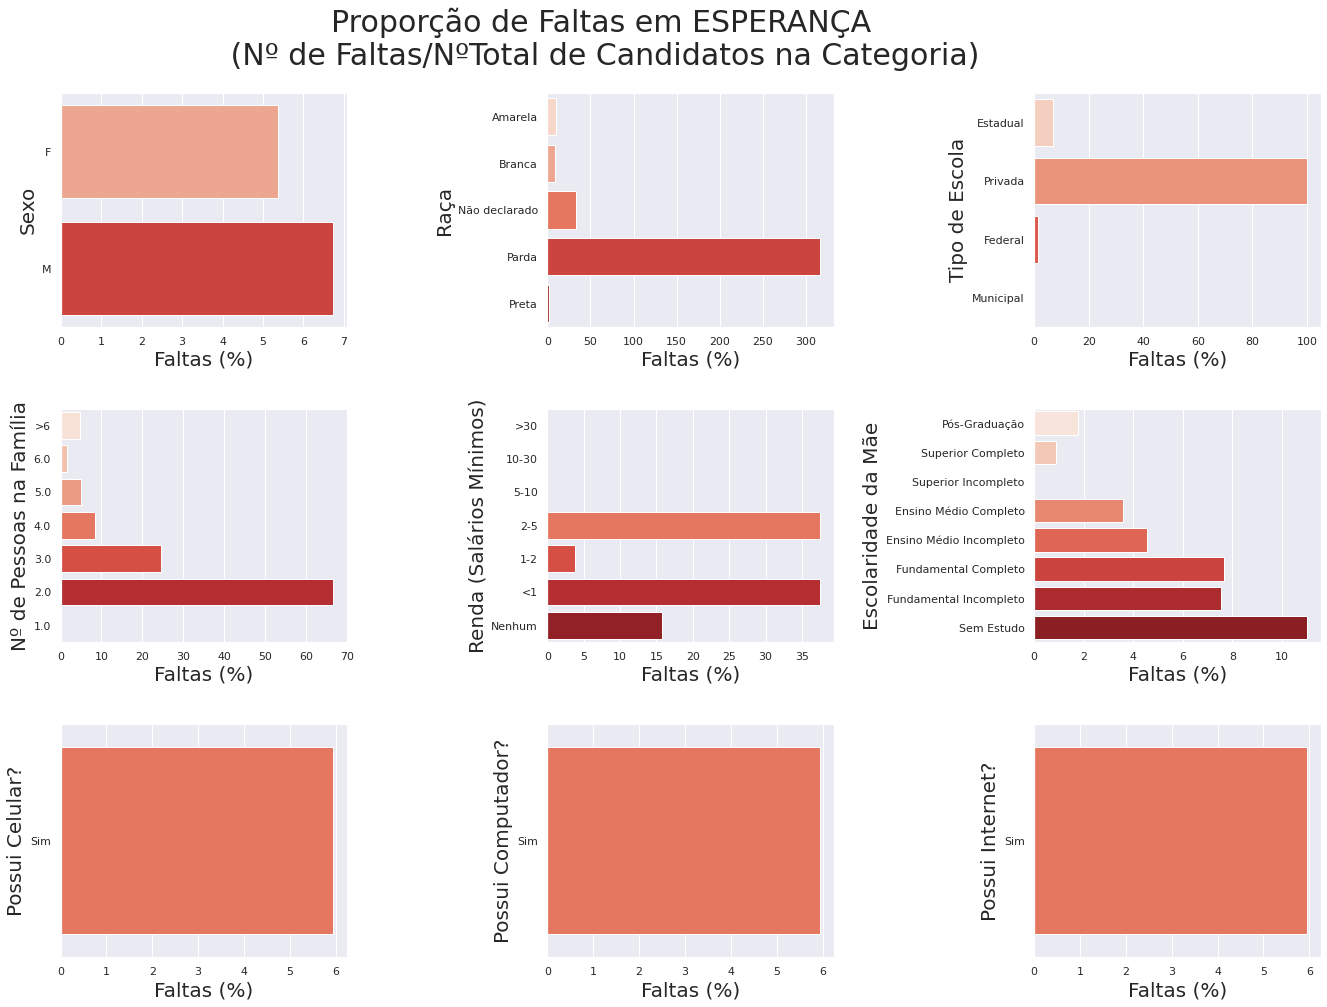

In [39]:
#@title
faltas = df.query('TP_PRESENCA==0')

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle(f'Proporção de Faltas em {nomeMunicipio}\n (Nº de Faltas/NºTotal de Candidatos na Categoria)', fontsize=30)

# Distancia entre os subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.35)
#SEXO =================================================================================================================
total=df.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_SEXO'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[0, 0], y ='TP_SEXO', x ='PorcentagemT', palette = 'Reds',data = freq)
axes[0,0].set_xlabel('Faltas (%)', fontsize=20)
axes[0,0].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
total=df.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_COR_RACA'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator


sns.barplot(ax=axes[0, 1], y ='TP_COR_RACA', x ='PorcentagemT', palette = 'Reds', data = freq)
axes[0,1].set_xlabel('Faltas (%)', fontsize=20)
axes[0,1].set_ylabel('Raça', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
total=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='PorcentagemT', palette = 'Reds',
            order=order, data = freq)
axes[0,2].set_xlabel('Faltas (%)', fontsize=20)
axes[0,2].set_ylabel('Tipo de Escola', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
faltas['NP'] = np.where(faltas['NPessoas'] > 6, ">6", faltas['NPessoas'] )
df['NP'] = np.where(df['NPessoas'] > 6, ">6", df['NPessoas'] )

total=df.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['NP'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='PorcentagemT', palette = 'Reds',order=order, data = freq)
axes[1,0].set_xlabel('Faltas (%)', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
total=df.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Renda'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='PorcentagemT', palette = 'Reds',order=order, data = freq)
axes[1,1].set_xlabel('Faltas (%)', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#ESCOLARIDADE ==============================================================================================================
total=df.groupby(by=['Escolaridade_Mae'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Escolaridade_Mae'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator
freq.sort_values(by='NU_INSCRICAO',ascending=False, inplace=True)


mais_inscritos = freq.head(20)
sns.barplot(ax=axes[1, 2], y ='Escolaridade_Mae', x ='PorcentagemT', 
            palette = 'Reds', order=order_esc, data = mais_inscritos)
axes[1,2].set_xlabel('Faltas (%)', fontsize=20)
axes[1,2].set_ylabel('Escolaridade da Mãe', fontsize=20)

#CELULAR ================================================================================================================================
total=df.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Celular'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='PorcentagemT', palette = 'Reds', data = freq)
axes[2,0].set_xlabel('Faltas (%)', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
total=df.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Computador'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[2, 1], y ='Computador', x ='PorcentagemT', palette = 'Reds', data = freq)
axes[2,1].set_xlabel('Faltas (%)', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
total=df.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
freq=faltas.groupby(by=['Internet'], as_index=False)['NU_INSCRICAO'].count()
freq['NU_INSCRICAO']=freq['NU_INSCRICAO']/100
freq['NU_INSCRICAO_T']=total['NU_INSCRICAO']/100
freq['Porcentagem'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO'].sum()*100         # Porcentagem do total de Inscritos
freq['PorcentagemT'] = freq['NU_INSCRICAO']/freq['NU_INSCRICAO_T']*100      # Porcentagem dentro fator

sns.barplot(ax=axes[2, 2], y ='Internet', x ='PorcentagemT', palette = 'Reds', data = freq)
axes[2,2].set_xlabel('Faltas (%)', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

#**NOTAS GERAIS**

Text(0.5, 1.0, 'Notas no município: ESPERANÇA \n \n (2003-2019)')

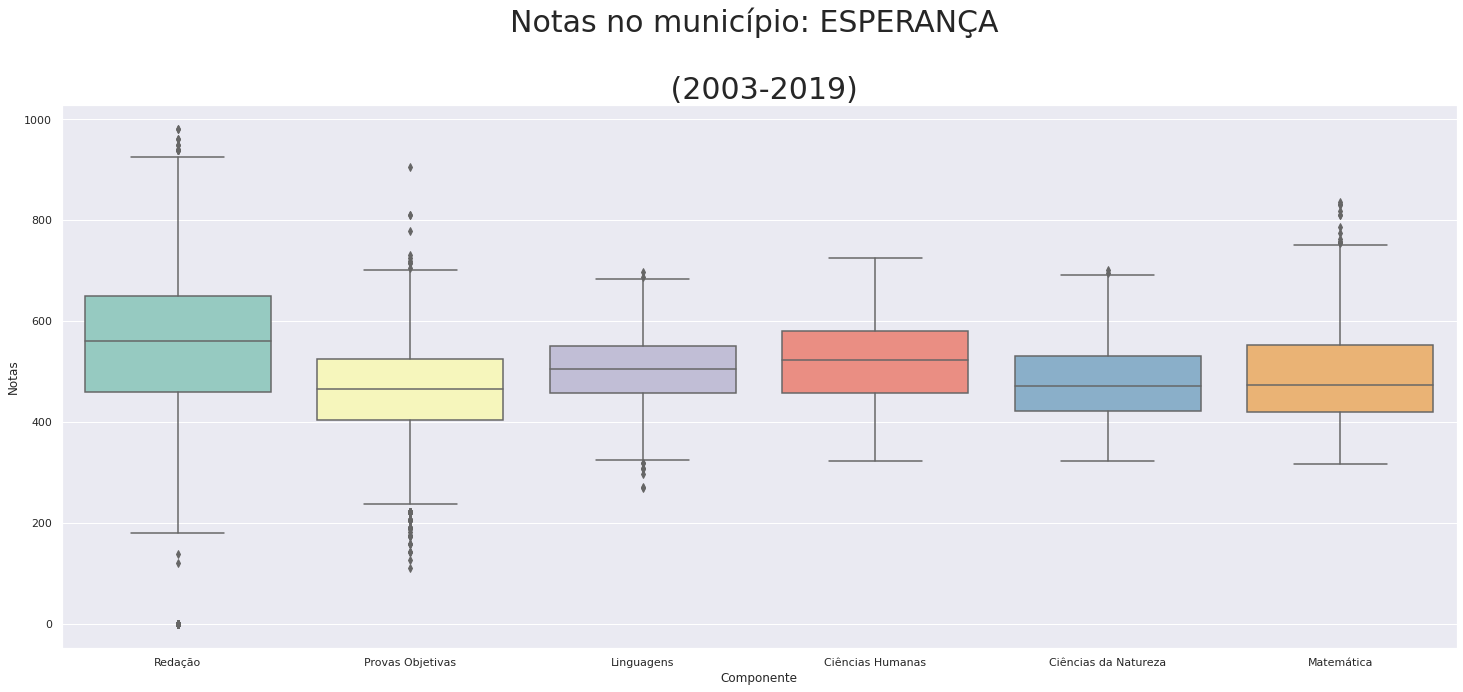

In [40]:
#@title
notas = df[['NU_NOTA_REDACAO','NU_NOTA_OBJETIVA','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT']]
plot_notas = pd.melt(df, id_vars=['NU_ANO'], value_vars=notas)
plot_notas.rename(columns={'value': 'Notas', 'variable':'Componente'}, inplace=True)

plt.subplots(figsize=(25,10)) #fig, axes = plt.subplots(1, 2, figsize=(25, 6), gridspec_kw={'width_ratios': [1,4 ]})
sns.set_style("white")
sns.set(font_scale=2)

# geral
g = sns.boxplot(x="Componente",y="Notas", palette="Set3",data=plot_notas);
g.set_xticklabels(['Redação', 'Provas Objetivas', 'Linguagens','Ciências Humanas','Ciências da Natureza','Matemática'], rotation=0)
g.set_title(f'Notas no município: {nomeMunicipio} \n \n (2003-2019)', fontsize=30)


#**DESEMPENHO CATEGORIAS**

##**Nota Média por Categoria**

In [41]:
#@title
df.dtypes

NU_ANO                     float64
CO_MUNICIPIO_RESIDENCIA      Int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA           float64
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_COR_RACA                 object
CO_ESCOLA                  float64
CO_MUNICIPIO_ESC           float64
NO_MUNICIPIO_ESC            object
CO_UF_ESC                  float64
SG_UF_ESC                   object
TP_DEPENDENCIA_ADM_ESC      object
TP_LOCALIZACAO_ESC          object
TP_PRESENCA                float64
Escolaridade_Pai            object
Escolaridade_Mae            object
NPessoas                   float64
Renda                       object
Celular                     object
Computador                  object
Internet                    object
NU_NOTA_OBJETIVA           float64
NU_NOTA_REDACAO            float64
NU_MEDIA_GERAL             float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC          

Text(0, 0.5, 'Possui Internet?')

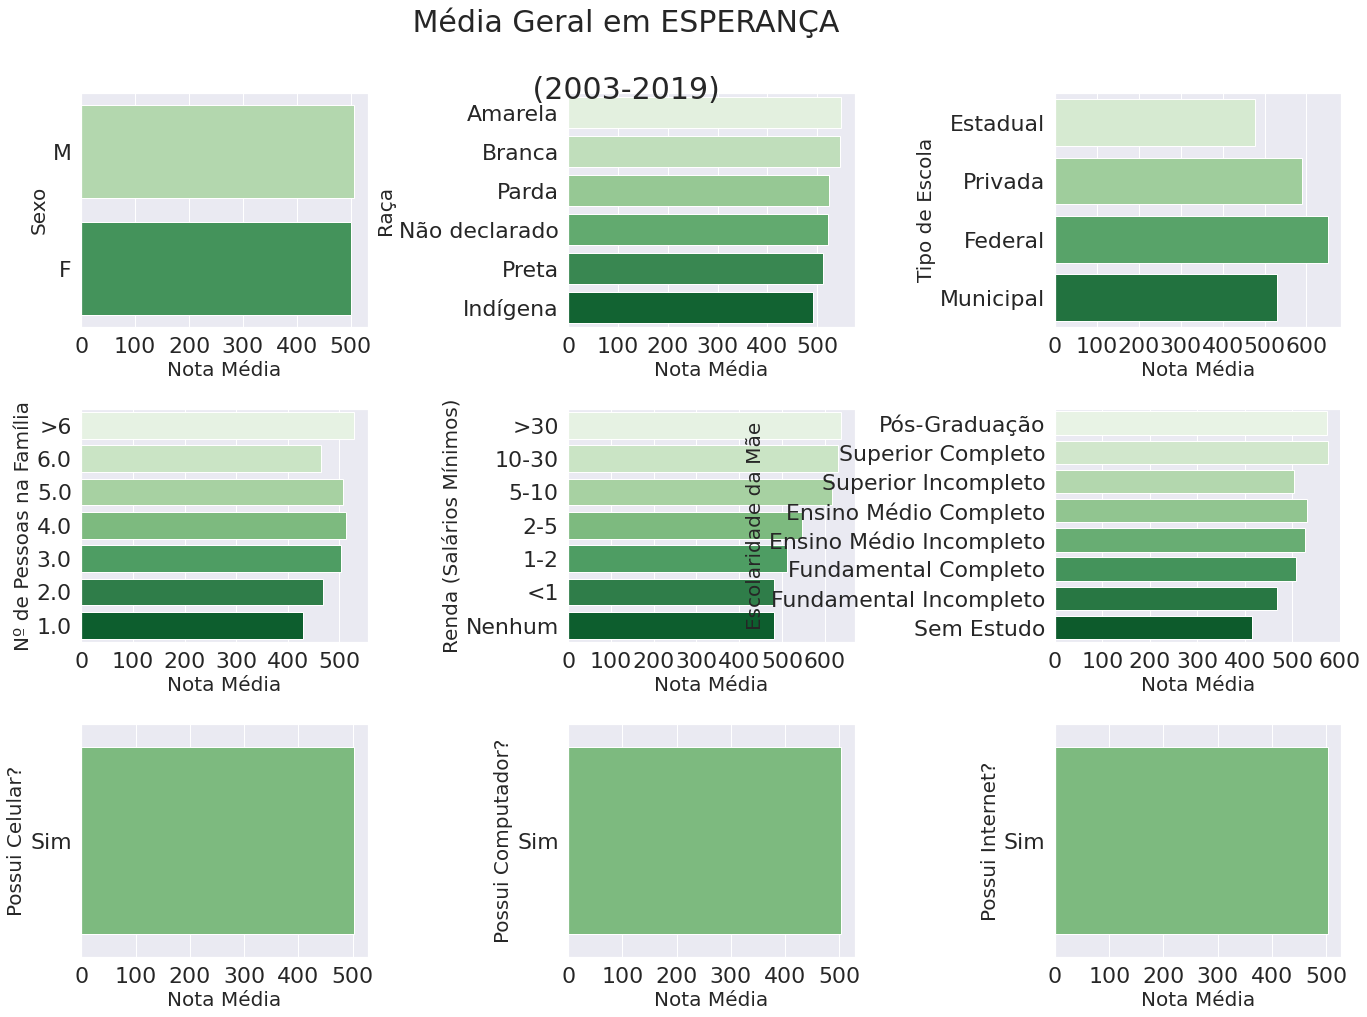

In [42]:
#@title
df['NOTA'] = df['NU_MEDIA_GERAL']
nome ="Média Geral"

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set_style("white")
sns.set(font_scale=1)

fig.suptitle(f' {nome} em {nomeMunicipio}\n \n (2003-2019)', fontsize=30)
 
# Distancia entre os subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.35)

#SEXO =================================================================================================================
sexo=df.groupby(by=['TP_SEXO'], as_index=False)['NOTA'].mean()
sexo['NOTA']=sexo['NOTA']
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 0], y ='TP_SEXO', x ='NOTA', palette = 'Greens',data = sexo)
axes[0,0].set_xlabel('Nota Média', fontsize=20)
axes[0,0].set_ylabel('Sexo', fontsize=20)

#RAÇA =================================================================================================================
raca=df.groupby(by=['TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca['NOTA']=raca['NOTA']
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.barplot(ax=axes[0, 1], y ='TP_COR_RACA', x ='NOTA', palette = 'Greens', data = raca)
axes[0,1].set_xlabel('Nota Média', fontsize=20)
axes[0,1].set_ylabel('Raça', fontsize=20)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()
tipEsc['NOTA']=tipEsc['NOTA']

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[0, 2], y ='TP_DEPENDENCIA_ADM_ESC', x ='NOTA', palette = 'Greens', order=order, data = tipEsc)
axes[0,2].set_xlabel('Nota Média', fontsize=20)
axes[0,2].set_ylabel('Tipo de Escola', fontsize=20)


#N DE PESSOAS NA CASA =================================================================================================================
df['NP'] = np.where(df['NPessoas'] > 6, ">6", df['NPessoas'] )
nPessoas=df.groupby(by=['NP'], as_index=False)['NOTA'].mean()
nPessoas['NOTA']=nPessoas['NOTA']

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.barplot(ax=axes[1, 0], y ='NP', x ='NOTA', palette = 'Greens',order=order, data = nPessoas)
axes[1,0].set_xlabel('Nota Média', fontsize=20)
axes[1,0].set_ylabel('Nº de Pessoas na Família', fontsize=20)

#RENDA ================================================================================================================================
renda=df.groupby(by=['Renda'], as_index=False)['NOTA'].mean()
renda['NOTA']=renda['NOTA']

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.barplot(ax=axes[1, 1], y ='Renda', x ='NOTA', palette = 'Greens',order=order, data = renda)
axes[1,1].set_xlabel('Nota Média', fontsize=20)
axes[1,1].set_ylabel('Renda (Salários Mínimos)', fontsize=20)

#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc['NOTA']=esc['NOTA']
esc.sort_values(by='NOTA',ascending=False, inplace=True)

order_esc = ['Pós-Graduação', 'Superior Completo','Superior Incompleto',
         'Ensino Médio Completo', 'Ensino Médio Incompleto',
         'Fundamental Completo', 'Fundamental Incompleto','Sem Estudo' ]
sns.barplot(ax=axes[1, 2], y ='Escolaridade_Mae', x ='NOTA', palette = 'Greens', 
            order=order_esc, data = esc)
axes[1,2].set_xlabel('Nota Média', fontsize=20)
axes[1,2].set_ylabel('Escolaridade da Mãe', fontsize=20)


#CELULAR ================================================================================================================================
cel=df.groupby(by=['Celular'], as_index=False)['NOTA'].mean()
cel['NOTA']=cel['NOTA']

#order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.barplot(ax=axes[2, 0], y ='Celular', x ='NOTA', palette = 'Greens', data = cel)
axes[2,0].set_xlabel('Nota Média', fontsize=20)
axes[2,0].set_ylabel('Possui Celular?', fontsize=20)


#Computador ================================================================================================================================
comp=df.groupby(by=['Computador'], as_index=False)['NOTA'].mean()
comp['NOTA']=comp['NOTA']

sns.barplot(ax=axes[2, 1], y ='Computador', x ='NOTA', palette = 'Greens', data = comp)
axes[2,1].set_xlabel('Nota Média', fontsize=20)
axes[2,1].set_ylabel('Possui Computador?', fontsize=20)


#Internet ================================================================================================================================
intern=df.groupby(by=['Internet'], as_index=False)['NOTA'].mean()
intern['NOTA']=intern['NOTA']

sns.barplot(ax=axes[2, 2], y ='Internet', x ='NOTA', palette = 'Greens', data = intern)
axes[2,2].set_xlabel('Nota Média', fontsize=20)
axes[2,2].set_ylabel('Possui Internet?', fontsize=20)

##**Nota Média por Categoria ao Longo dos Anos**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


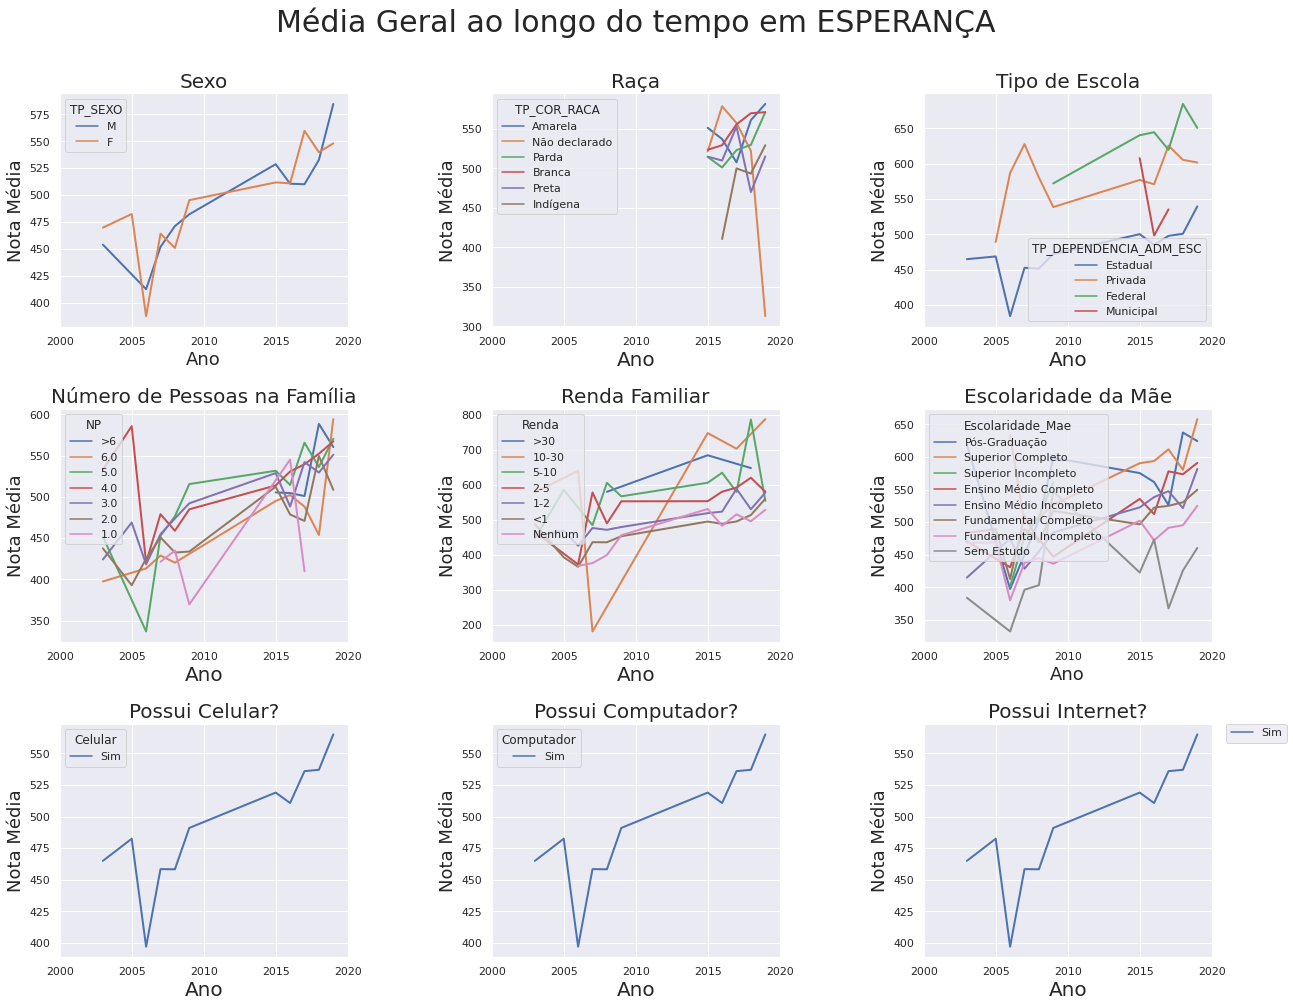

In [43]:
#@title
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set_style("white")
sns.set(font_scale=1)

# Distancia entre os subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.35)

fig.suptitle(f'{nome} ao longo do tempo em {nomeMunicipio}', fontsize=30)


#SEXO =================================================================================================================
sexo=df.groupby(by=['NU_ANO','TP_SEXO'], as_index=False)['NOTA'].mean()
sexo.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 0], x='NU_ANO', hue ='TP_SEXO', y ='NOTA',linewidth = 2,data = sexo)
axes[0,0].set_xlabel('Ano', fontsize=18)
axes[0,0].set_ylabel('Nota Média', fontsize=18)
axes[0,0].set_title('Sexo', fontsize=20)
axes[0,0].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#RAÇA =================================================================================================================
raca=df.groupby(by=['NU_ANO','TP_COR_RACA'], as_index=False)['NOTA'].mean()
raca.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[0, 1], x='NU_ANO', hue ='TP_COR_RACA', y ='NOTA', linewidth = 2, data = raca)
axes[0,1].set_xlabel('Ano', fontsize=20)
axes[0,1].set_ylabel('Nota Média', fontsize=18)
axes[0,1].set_title('Raça', fontsize=20)
axes[0,1].set_xticks([2000,2005,2010,2015,2020])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#DEPENDENCIA ADMNISTRITIVA ================================================================================================================================
tipEsc=df.groupby(by=['NU_ANO','TP_DEPENDENCIA_ADM_ESC'], as_index=False)['NOTA'].mean()

order = ['Estadual','Privada', 'Federal', 'Municipal']
sns.lineplot(ax=axes[0, 2], x='NU_ANO', hue ='TP_DEPENDENCIA_ADM_ESC', y='NOTA', linewidth = 2, hue_order=order, data = tipEsc)
axes[0,2].set_xlabel('Ano', fontsize=20)
axes[0,2].set_ylabel('Nota Média', fontsize=18)
axes[0,2].set_title('Tipo de Escola', fontsize=20)
axes[0,2].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#N DE PESSOAS NA CASA =================================================================================================================
nPessoas=df.groupby(by=['NU_ANO','NP'], as_index=False)['NOTA'].mean()

order = ['>6','6.0', '5.0',  '4.0', '3.0','2.0','1.0']
sns.lineplot(ax=axes[1, 0], x ='NU_ANO', hue ='NP', y ='NOTA',hue_order=order, linewidth = 2, data = nPessoas)
axes[1,0].set_xlabel('Ano', fontsize=20)
axes[1,0].set_ylabel('Nota Média', fontsize=18)
axes[1,0].set_title('Número de Pessoas na Família', fontsize=20)
axes[1,0].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#RENDA ================================================================================================================================
renda=df.groupby(by=['NU_ANO','Renda'], as_index=False)['NOTA'].mean()

order = ['>30','10-30', '5-10',  '2-5', '1-2','<1', 'Nenhum']
sns.lineplot(ax=axes[1, 1], x='NU_ANO', hue ='Renda', y ='NOTA', linewidth = 2,hue_order=order, data = renda)
axes[1,1].set_xlabel('Ano', fontsize=20)
axes[1,1].set_ylabel('Nota Média', fontsize=18)
axes[1,1].set_title('Renda Familiar', fontsize=20)
axes[1,1].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ESCOLARIDADE ==============================================================================================================
esc=df.groupby(by=['NU_ANO','Escolaridade_Mae'], as_index=False)['NOTA'].mean()
esc.sort_values(by='NOTA',ascending=False, inplace=True)

sns.lineplot(ax=axes[1, 2], x='NU_ANO', hue ='Escolaridade_Mae', y ='NOTA', 
             linewidth = 2, hue_order=order_esc, data = esc)
axes[1,2].set_xlabel('Ano', fontsize=18)
axes[1,2].set_ylabel('Nota Média', fontsize=18)
axes[1,2].set_title('Escolaridade da Mãe', fontsize=20)
axes[1,2].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#CELULAR ================================================================================================================================
cel=df.groupby(by=['NU_ANO','Celular'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 0], x='NU_ANO', hue ='Celular', y ='NOTA',  
             linewidth = 2, data = cel)
axes[2,0].set_xlabel('Ano', fontsize=20)
axes[2,0].set_ylabel('Nota Média', fontsize=18)
axes[2,0].set_title('Possui Celular?', fontsize=20)
axes[2,0].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Computador ================================================================================================================================
comp=df.groupby(by=['NU_ANO','Computador'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 1], x='NU_ANO', hue ='Computador', y ='NOTA', 
             linewidth = 2, data = comp)
axes[2,1].set_xlabel('Ano', fontsize=20)
axes[2,1].set_ylabel('Nota Média', fontsize=18)
axes[2,1].set_title('Possui Computador?', fontsize=20)
axes[2,1].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#Internet ================================================================================================================================
intern=df.groupby(by=['NU_ANO','Internet'], as_index=False)['NOTA'].mean()

sns.lineplot(ax=axes[2, 2], x='NU_ANO', hue ='Internet', y ='NOTA',
             linewidth = 2, data = intern)
axes[2,2].set_xlabel('Ano', fontsize=20)
axes[2,2].set_ylabel('Nota Média', fontsize=18)
axes[2,2].set_title('Possui Internet?', fontsize=20)
axes[2,2].set_xticks([2000,2005,2010,2015,2020])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)